---
title: "School Without Hygiene: A Global Reality"

subtitle: "BAA1030: Data Analytics & Story Telling"

author: "Anusha Rodrigues"

date: today

professor: "Dr. Damien Dupre"

student: "A00046821"

format:
  html:
    embed-resources: true
    code-fold: true
    code-tools: false
    code-block-bg: true
    code-block-border-left: true
    code-summary: "Show the code"     
    toc: true
    toc-title: "On this page"          
    toc-depth: 3                      
    smooth-scroll: true                
    theme: cosmo                       
    highlight-style: github    
    self-contained: true
        
execute:
  echo: false                          
  warning: false                       
  message: false                       
editor: visual                        
---

In [ ]:
# Importing libraries and packages for the visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import os
import tempfile
import urllib.request
import zipfile
import geopandas as gpd

In [7]:
# LoadING the datasets
hygiene_data = pd.read_csv('cleaned_unicef_indicator_anusha.csv')
metadata = pd.read_csv('cleaned_unicef_metadata _anusha.csv')

In [8]:
print("School Hygiene Data:")
print(hygiene_data.head())

print("\nHygiene data Info:")
print(hygiene_data.info())

School Hygiene Data:
   country  numeric_code  time_period  \
0  Andorra            20         2000   
1  Andorra            20         2001   
2  Andorra            20         2002   
3  Andorra            20         2003   
4  Andorra            20         2004   

   Proportion of schools with no hygiene service  
0                                            0.0  
1                                            0.0  
2                                            0.0  
3                                            0.0  
4                                            0.0  

Hygiene data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        2489 non-null   object 
 1   numeric_code                                   2489 non-null   int6

In [9]:
# Basic data information
print("\nMetadata:")
print(metadata.head())

print("\nMetadata Info:")
print(metadata.info())


Metadata:
       country  numeric_code  year  population,_total  \
0  Afghanistan             4  1960          9035043.0   
1  Afghanistan             4  1961          9214083.0   
2  Afghanistan             4  1962          9404406.0   
3  Afghanistan             4  1963          9604487.0   
4  Afghanistan             4  1964          9814318.0   

   gdp_per_capita_(constant_2015_us$)  gni_(current_us$)  \
0                                 NaN       5.488888e+08   
1                                 NaN       5.600000e+08   
2                                 NaN       5.577778e+08   
3                                 NaN       7.666667e+08   
4                                 NaN       8.155556e+08   

   inflation,_consumer_prices_(annual_%)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   life_expectancy_a

In [10]:
# Merging the datasets
hygiene_data = hygiene_data.rename(columns={'time_period': 'year'})
combined_data = pd.merge(hygiene_data, metadata, on=['country', 'numeric_code', 'year'], how='inner')

print("Combined Data:")
print(combined_data.head())
print(combined_data.describe())

Combined Data:
   country  numeric_code  year  Proportion of schools with no hygiene service  \
0  Andorra            20  2000                                            0.0   
1  Andorra            20  2001                                            0.0   
2  Andorra            20  2002                                            0.0   
3  Andorra            20  2003                                            0.0   
4  Andorra            20  2004                                            0.0   

   population,_total  gdp_per_capita_(constant_2015_us$)  gni_(current_us$)  \
0            65685.0                        34113.817377                NaN   
1            65852.0                        36790.103707                NaN   
2            66506.0                        38084.484309                NaN   
3            69486.0                        39620.320159                NaN   
4            74325.0                        40054.321152                NaN   

   inflation,_consumer_

In [11]:
# Check for missing values
print("\nMissing values in combined data:")
print(combined_data.isnull().sum())
print("\nCombined Data Shape:", combined_data.shape)


Missing values in combined data:
country                                             0
numeric_code                                        0
year                                                0
Proportion of schools with no hygiene service       0
population,_total                                   0
gdp_per_capita_(constant_2015_us$)                 74
gni_(current_us$)                                 158
inflation,_consumer_prices_(annual_%)             294
life_expectancy_at_birth,_total_(years)           207
military_expenditure_(%_of_gdp)                   708
fossil_fuel_energy_consumption_(%_of_total)      1454
gdp_growth_(annual_%)                              76
birth_rate,_crude_(per_1,000_people)              141
hospital_beds_(per_1,000_people)                  832
dtype: int64

Combined Data Shape: (2360, 14)


In [12]:
# Cleaning the data - removing rows with missing values
key_columns = ['Proportion of schools with no hygiene service',
              'life_expectancy_at_birth,_total_(years)',
              'gdp_per_capita_(constant_2015_us$)']
cleaned_data = combined_data.dropna(subset=key_columns)
cleaned_data.columns = cleaned_data.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nCleaned data shape:", cleaned_data.shape)
cleaned_data.head(5)


Cleaned data shape: (2089, 14)


,country,numeric_code,year,proportion_of_schools_with_no_hygiene_service,"population,_total",gdp_per_capita_(constant_2015_us$),gni_(current_us$),"inflation,_consumer_prices_(annual_%)","life_expectancy_at_birth,_total_(years)",military_expenditure_(%_of_gdp),fossil_fuel_energy_consumption_(%_of_total),gdp_growth_(annual_%),"birth_rate,_crude_(per_1,000_people)","hospital_beds_(per_1,000_people)"
24,Angola,24,2016,12.96905,29183070.0,3020.983328,5.001006e+10,30.694415,61.092,2.733335,NaN,-2.580050,41.377,NaN
25,Angola,24,2017,12.96905,30234839.0,2911.600842,6.916123e+10,29.844480,61.680,2.507983,NaN,-0.147213,40.810,NaN
26,Angola,24,2018,12.96905,31297155.0,2775.746423,7.331311e+10,19.628938,62.144,1.955787,NaN,-1.316362,40.236,NaN
27,Angola,24,2019,12.96905,32375632.0,2664.438510,6.448816e+10,17.080954,62.448,1.739072,NaN,-0.702273,39.725,0.75
28,Angola,24,2020,12.96905,33451132.0,2433.376373,4.414504e+10,22.271539,62.261,1.736994,NaN,-5.638215,39.271,NaN


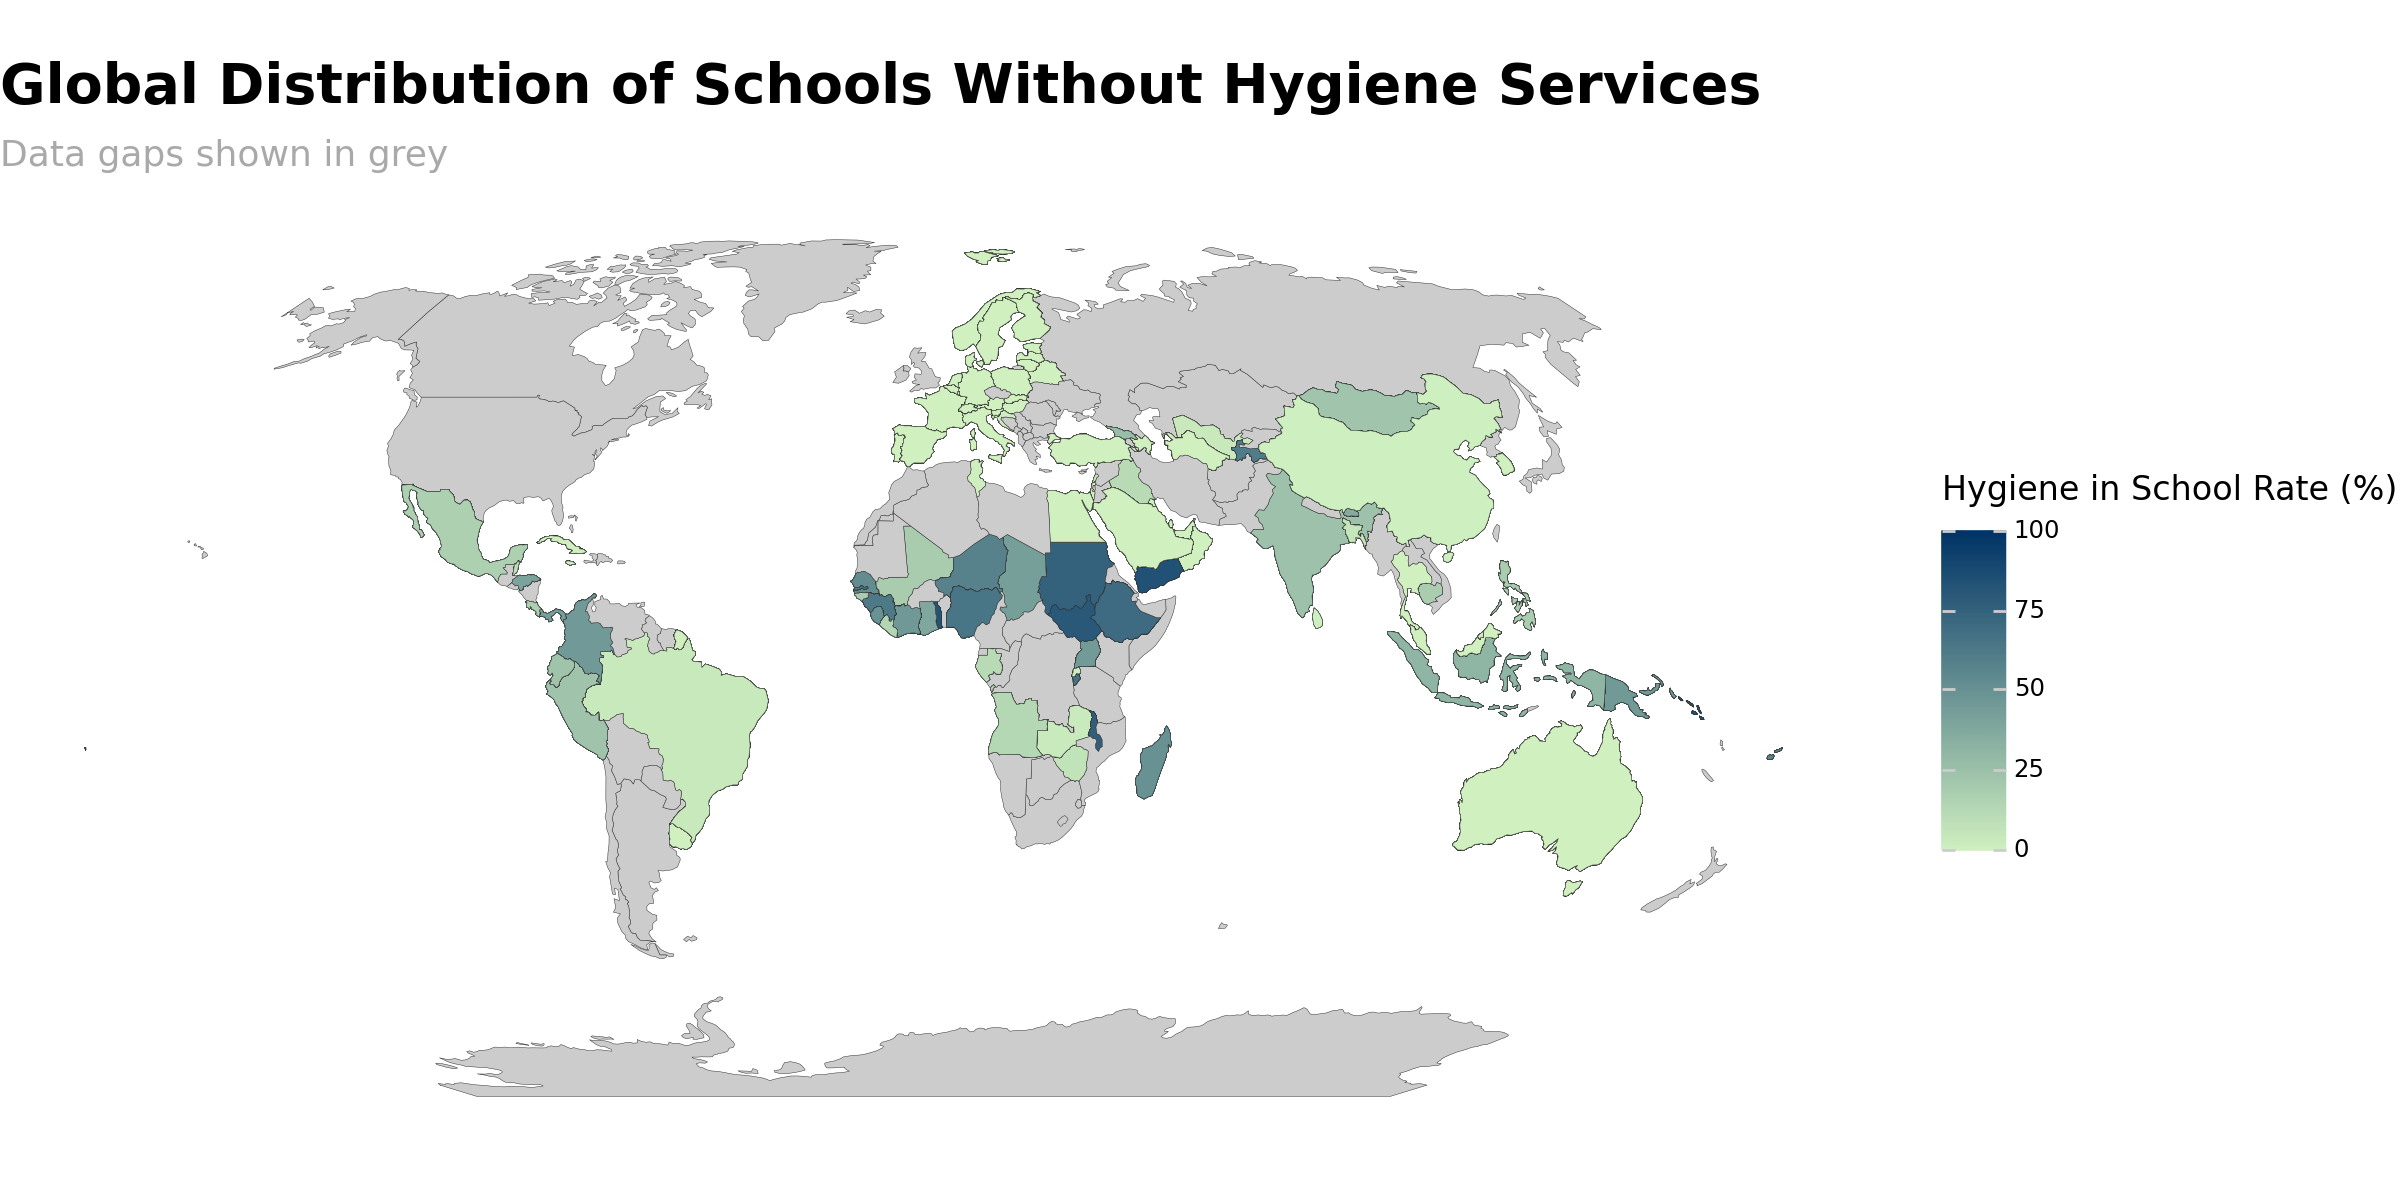

In [13]:
# Fetching GeoJSON data for country
!wget -q https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson -O data_countries.geojson


geo_df = gpd.read_file("data_countries.geojson")
geo_df = geo_df.rename(columns={'ADMIN': 'country'})

# Merging geo data with personal dataset
geo_hygiene = geo_df.merge(
    cleaned_data[['country', 'proportion_of_schools_with_no_hygiene_service']],
    how='left',
    on='country'
)
geo_hygiene = geo_hygiene.to_crs("+proj=robin")


geo_polygons = (
    geo_hygiene
    .explode(index_parts=False)
    .reset_index(drop=True)
)
geo_polygons = geo_polygons[
    geo_polygons.geometry.notnull() & (geo_polygons.geometry.geom_type == 'Polygon')
]

# Extracting polygon coordinates
def coords_from_polygon(row):
    x_vals, y_vals = row.geometry.exterior.coords.xy
    return pd.DataFrame({
        'x_proj': x_vals,
        'y_proj': y_vals,
        'country': row['country'],
        'urban_pct': row['proportion_of_schools_with_no_hygiene_service'],
        'shape_id': row.name
    })

#Plotting
plot_points = pd.concat(
    [coords_from_polygon(r) for _, r in geo_polygons.iterrows()],
    ignore_index=True
)

hygiene_choropleth = (
    ggplot(plot_points, aes(x='x_proj', y='y_proj', group='shape_id', fill='urban_pct')) +
    geom_polygon(color='#333333', size=0.1) +
    scale_fill_gradient(
        low="#d0f0c0", high="#003366",
        name="Hygiene in School Rate (%)",
        na_value="#cccccc"
    ) +
    coord_equal() +
    theme_void() +
    labs(
        title="Global Distribution of Schools Without Hygiene Services",
        subtitle="Data gaps shown in grey"
    ) +
    theme(
        figure_size=(12, 6),
        plot_title=element_text(size=20, weight='bold'),
        plot_subtitle=element_text(size=13, color='darkgray'),
        legend_title=element_text(size=12),
        legend_position='right'
    )
)

display(hygiene_choropleth)

# **Global Distribution of Schools without Hygiene Service**

This map highlights an unseen emergency, *millions of children attend schools lacking essential hygiene facilities such as soap and water.* The deeper green regions, particularly in **sections of Africa and South Asi**a, indicate the most severe issues, with more than **80%** of schools missing these essentials.

Conversely, nations in **grey** possess superior facilities, yet this does not imply that the work is complete. Each child is entitled to a secure, clean environment for education. This map serves as a reminder that fundamental hygiene is not a privilege — it's a right!



Let's utilize this information to initiate transformation, one school at a time!

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 43 rows containing missing values.


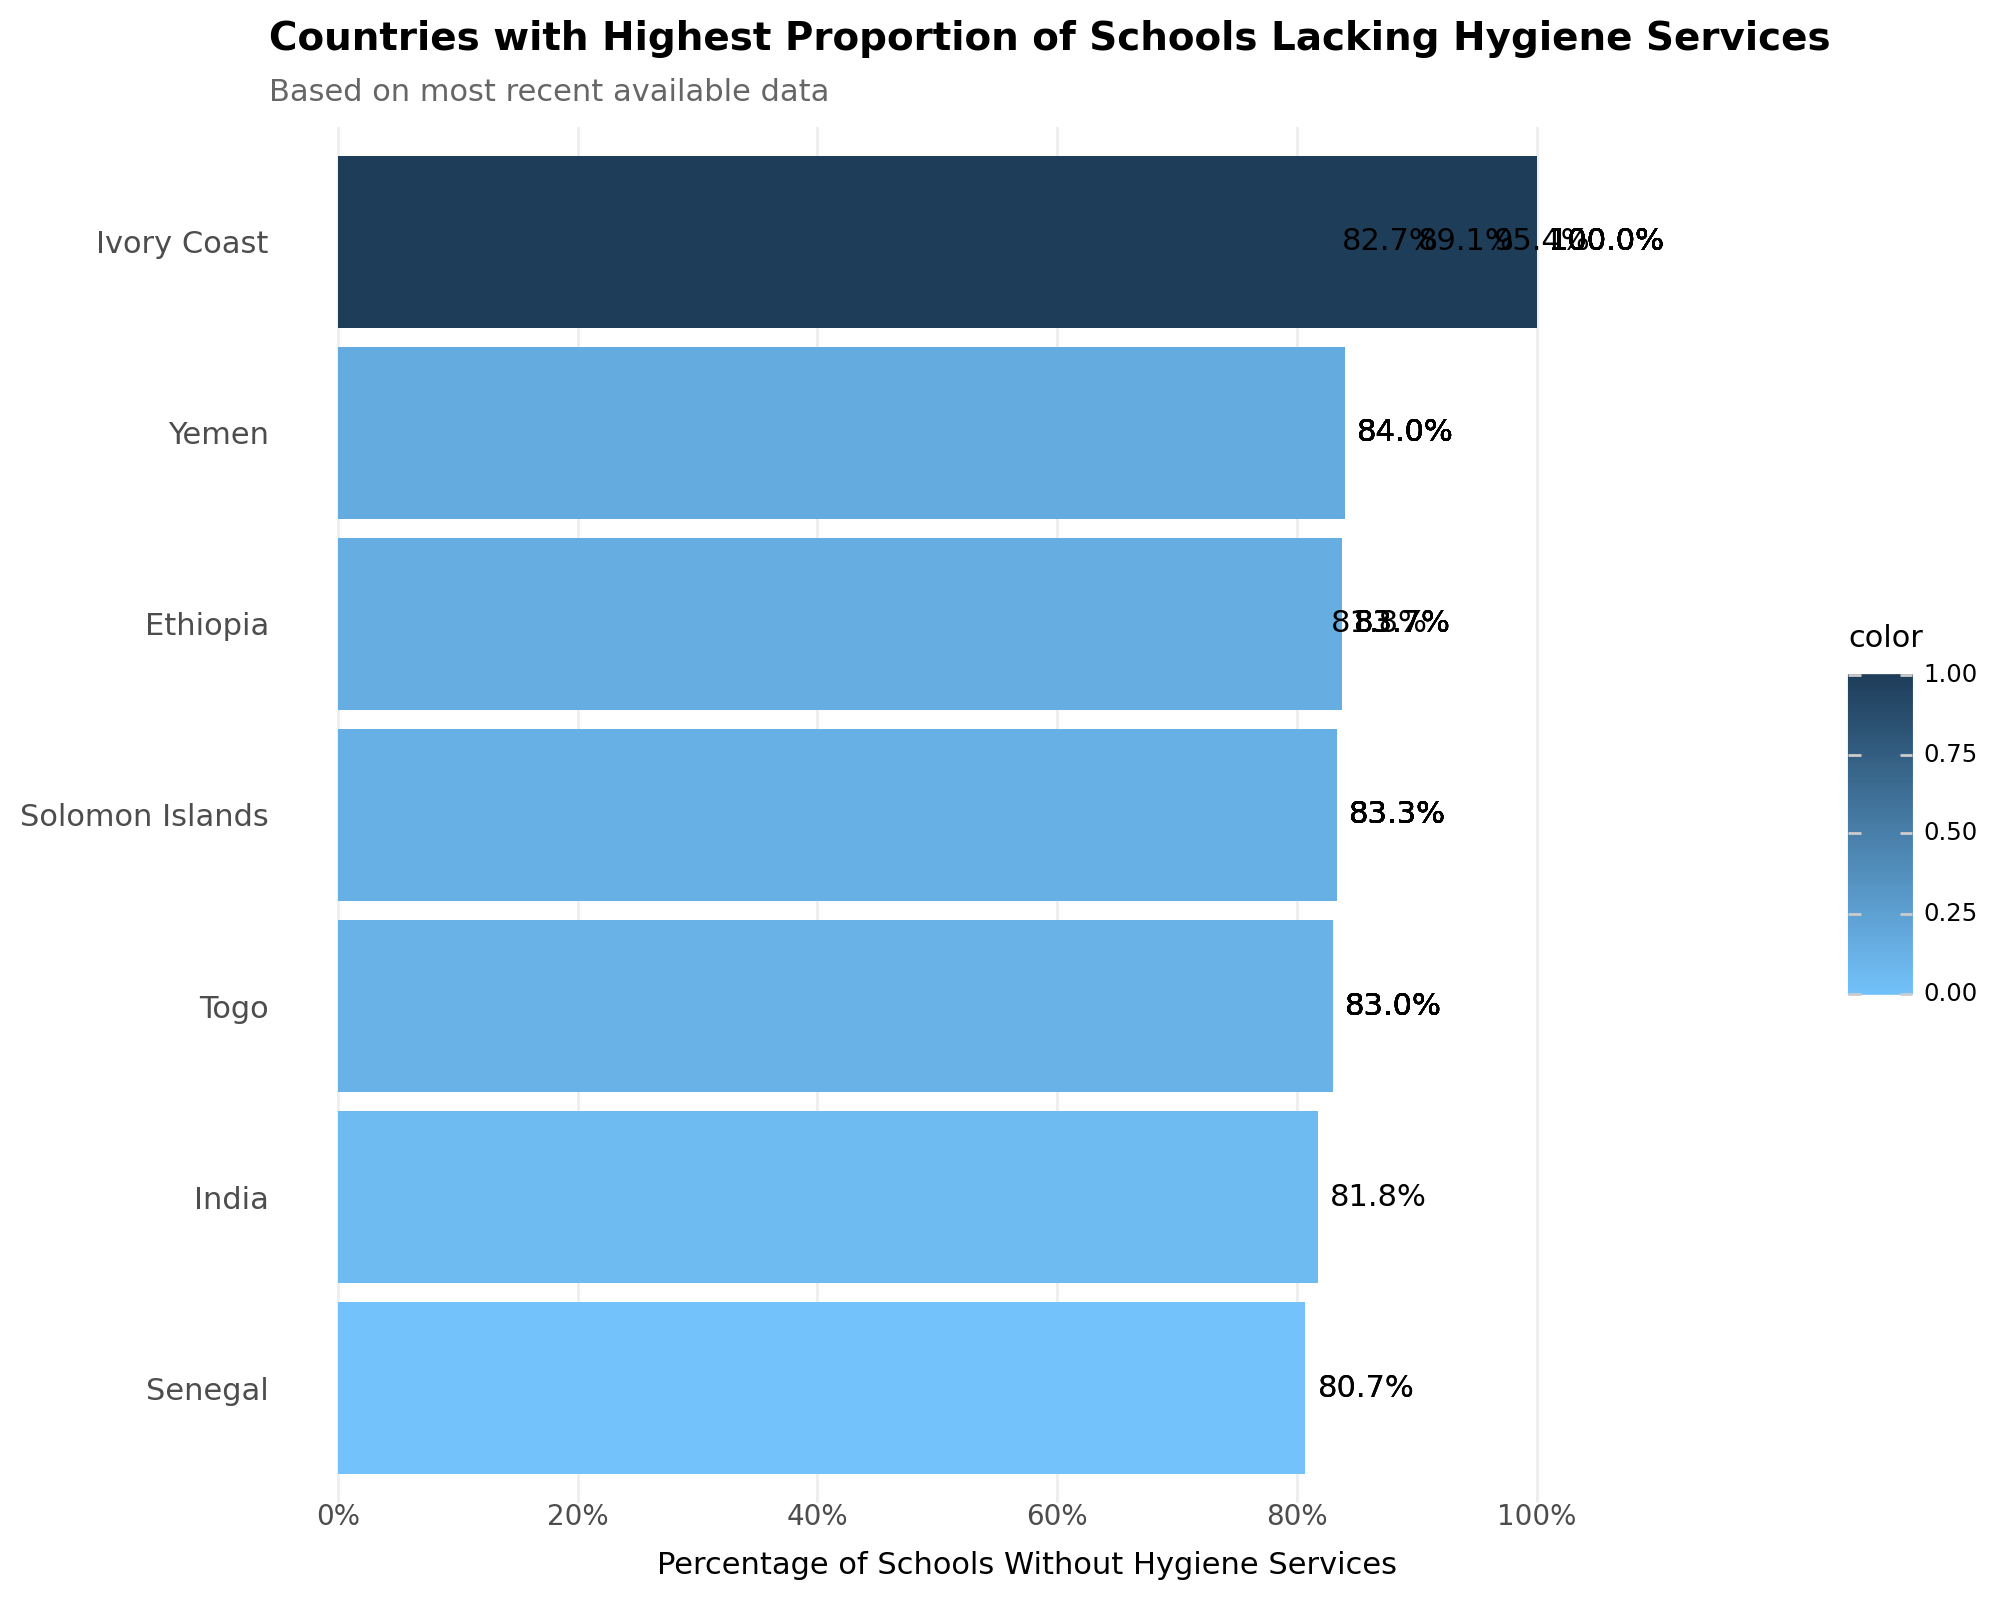

In [20]:
import numpy as np
import pandas as pd
from plotnine import *
from plotnine.themes import theme_minimal


worst_hygiene = cleaned_data.sort_values('proportion_of_schools_with_no_hygiene_service', ascending=False).head(50)

# Normalizing 'color' column
worst_hygiene = worst_hygiene.copy()
worst_hygiene['color'] = np.interp(
    worst_hygiene['proportion_of_schools_with_no_hygiene_service'],
    (worst_hygiene['proportion_of_schools_with_no_hygiene_service'].min(),
     worst_hygiene['proportion_of_schools_with_no_hygiene_service'].max()),
    (0, 1)
)

worst_hygiene['label'] = (worst_hygiene['proportion_of_schools_with_no_hygiene_service'].round(1)).astype(str) + '%'

# Bar chart
bar_chart = (
    ggplot(worst_hygiene,
           aes(x='reorder(country, proportion_of_schools_with_no_hygiene_service)',
               y='proportion_of_schools_with_no_hygiene_service',
               fill='color')) +
    geom_bar(stat='identity') +
    scale_fill_gradient(low='#73C2FB', high='#1E3D59') +
    coord_flip() +
    geom_text(
        aes(label='label'),
        ha='left',
        nudge_y=1
    ) +
    labs(
        title='Countries with Highest Proportion of Schools Lacking Hygiene Services',
        subtitle='Based on most recent available data',
        x='',
        y='Percentage of Schools Without Hygiene Services'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 8),
        plot_title=element_text(weight='bold', size=14),
        plot_subtitle=element_text(size=11, color='#666666'),
        axis_text_y=element_text(size=11),
        axis_text_x=element_text(size=10),
        panel_grid_major_y=element_blank(),
        panel_grid_minor=element_blank(),
        panel_grid_major_x=element_line(color='#EEEEEE'),
        axis_ticks=element_blank()
    ) +
    scale_y_continuous(
        limits=[0, worst_hygiene['proportion_of_schools_with_no_hygiene_service'].max() * 1.15],
        breaks=list(range(0, 101, 20)),
        labels=lambda l: [f'{v}%' for v in l]
    )
)

display(bar_chart)


# **Countries with the Highest School Hygiene Deficit**


Many children in multiple zones throughout the world experience difficulties with inadequate hygiene facilities in their educational institutions. Research indicates **Yemen** faces extreme difficulties since **85%**  of its educational facilities do not possess appropriate sanitation facilities. The **Solomon Islands** follow Yemen in terms of school challenges due to inadequate hygiene facilities because **82%** of educational institutions fail to meet these basic needs.

The educational institutions of **Togo and South Sudan** together with **Malawi** experience a severe shortfall of basic amenities including handwashing facilities in more than three-quarters of their facilities. Although ranked lower on the list Niger and Tajikistan exhibit critical differences that affect the health and educational performance of their students.

Figures in these data points reflect actual obstacles that block access to education and health as well as dignity for the population. Getting rid of these pressing shortages needs more than just building structures since schools ought to provide safe learning environments with proper healthcare facilities to create opportunities for safe education and better futures for every child.

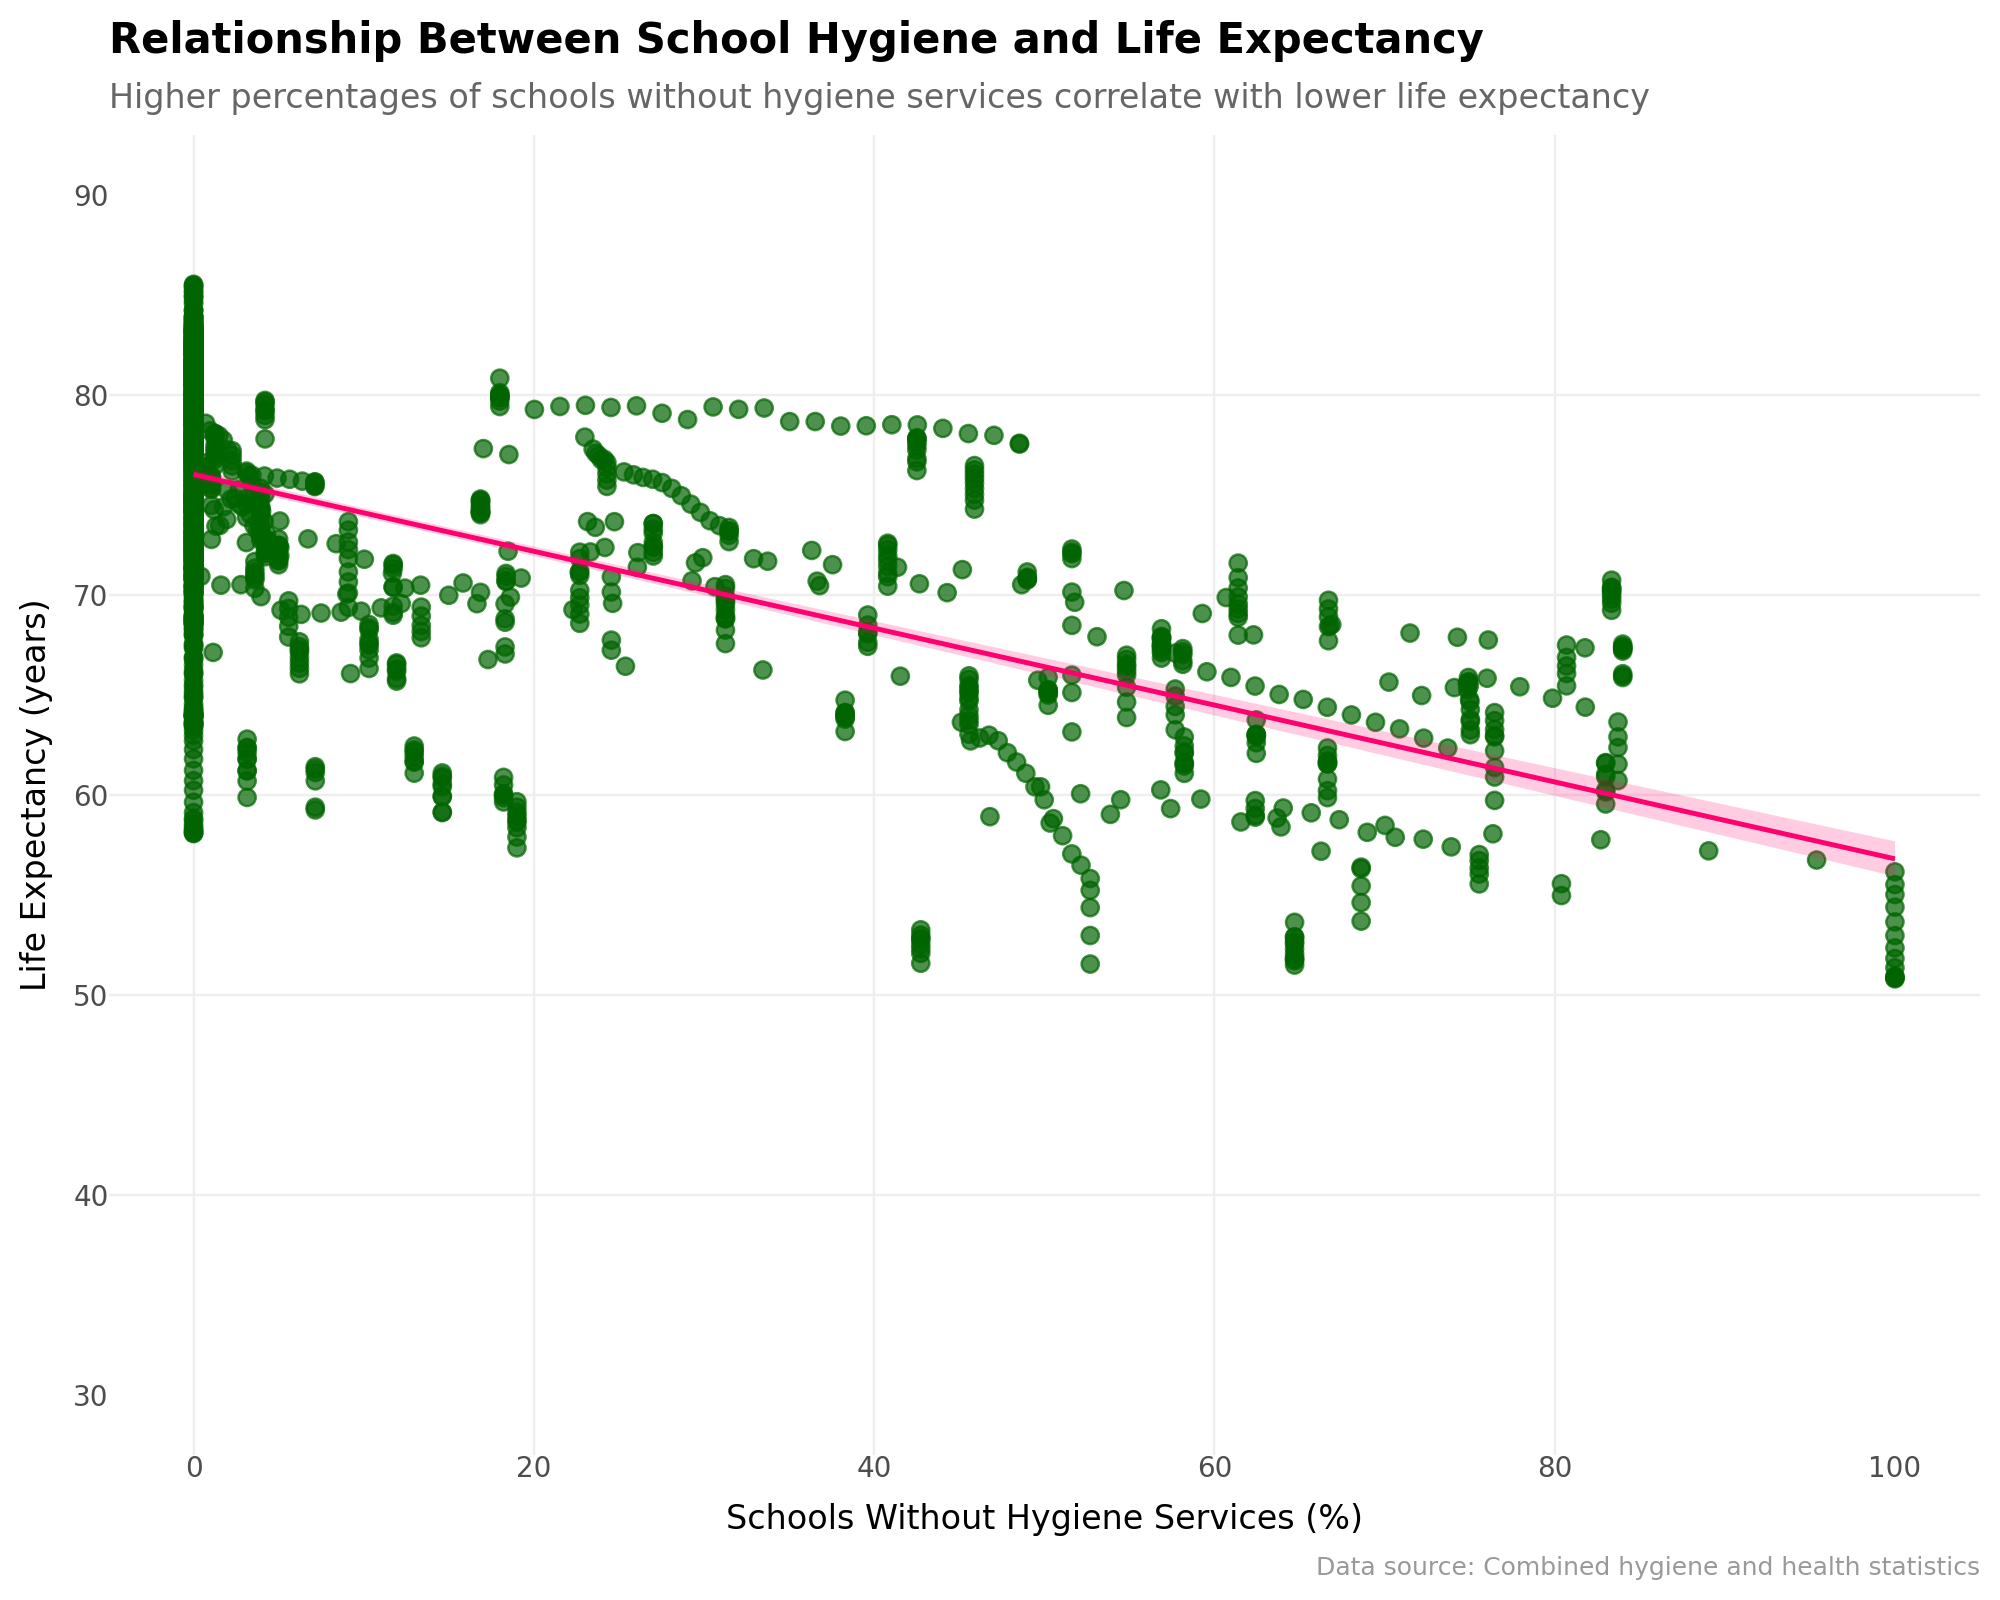

In [21]:
from plotnine import *
import numpy as np

# Scatterplot with regression line
scatter_plot = (
    ggplot(cleaned_data,
           aes(x='proportion_of_schools_with_no_hygiene_service',
               y='life_expectancy_at_birth,_total_(years)')) +

    geom_hline(yintercept=np.arange(40, 90, 10), color='#EEEEEE', size=0.5) +
    geom_vline(xintercept=np.arange(0, 100, 20), color='#EEEEEE', size=0.5) +

    geom_point(color='#006400', alpha=0.7, size=3) +

    geom_smooth(method='lm', color='#FF006E', fill='#FF006E', alpha=0.2) +

    labs(
        title='Relationship Between School Hygiene and Life Expectancy',
        subtitle='Higher percentages of schools without hygiene services correlate with lower life expectancy',
        x='Schools Without Hygiene Services (%)',
        y='Life Expectancy (years)',
        caption='Data source: Combined hygiene and health statistics'
    ) +

    theme_minimal() +
    theme(
        figure_size=(10, 8),
        plot_title=element_text(face='bold', size=15),
        plot_subtitle=element_text(size=12, color='#666666'),
        axis_title=element_text(size=12),
        axis_text=element_text(size=10),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        plot_caption=element_text(size=9, color='#999999')
    ) +

    scale_x_continuous(limits=[0, 100], breaks=range(0, 101, 20)) +
    scale_y_continuous(limits=[30, 90], breaks=range(30, 91, 10))
)

display(scatter_plot)

# **Global Distribution of School Hygiene Gaps**

This worldwide choropleth map depicts a compelling narrative about a fundamental necessity that far too many schools still do not have—hygiene. The color gradient, transitioning from pale yellow to dark red, uncovers a stark reality: in numerous areas, children attend school without having clean water, soap, or safe sanitation.

Sub-Saharan Africa is particularly striking, as many nations are marked in dark red, signifying that more than **70%** of their schools lack fundamental hygiene facilities. South and Southeast Asia also exhibit concerning levels, with **40–60%** of schools lacking adequacy. Latin America, although relatively better positioned, still exhibits areas of concern, primarily within the **20–40%** range.

The contrasts among regions are striking, emphasizing precisely where global focus—and funding—needs to be directed. Nations marked in the darkest red demand urgent measures, not merely via financial support, but through effective cooperation. Adjacent countries can collaborate, exchanging strategies and resources, while administrations coordinate their initiatives in education, health, and water sectors to create enduring infrastructure.

To transform this map into a visual representation of progress, we need to take action—by deploying mobile hygiene units to the most neglected regions, educating trainers on sanitation and upkeep, and monitoring outcomes with consistent updates. Enhancing school hygiene goes beyond just water or soap; it involves dignity, safety, and ensuring that every child can learn in a healthy setting.

In [22]:
import plotly.express as px

fig = px.line(
    cleaned_data,
    x="year",
    y="proportion_of_schools_with_no_hygiene_service",
    color="country",
    line_group="country",
    hover_name="country",
    title="Trends in Schools Without Hygiene Services (All Countries)",
)

# Add dropdown to filter by country
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": "All Countries",
                 "method": "update",
                 "args": [{"visible": [True] * len(fig.data)},
                          {"title": "All Countries"}]}
            ] + [
                {"label": country,
                 "method": "update",
                 "args": [{"visible": [trace.name == country for trace in fig.data]},
                          {"title": f"Trend for {country}"}]}
                for country in cleaned_data["country"].unique()
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.5, y=-0.15,
    text="Data source: UNESCO Institute for Statistics | Created with Plotly",
    showarrow=False,
    font=dict(size=10, color="#999999"),
    align="center",
)

fig.show()


# **Hygiene Services Trends in Schools: A Global Comparison Through Time**

This interactive dashboard showcases the Hygiene Services Trend in schools from various countries between **2016 and 2022**. Users can narrow their search by country to examine particular trends and assess global sanitation advancements.

For instance, **Angola** displays a stagnant pattern, with around **13%** of schools continuously lacking hygiene services throughout the years. Conversely, **Bangladesh** shows steady progress, mirroring national initiatives to improve school sanitation facilities. At the same time, **Macao** upholds a consistently high standard of hygiene access, with very few schools missing essential services.

These trends highlight an important worldwide disparity: while certain nations consistently move towards universal sanitation coverage, others face ongoing deficiencies. Utilizing data from UNICEF indicators and metadata, this visualization showcases achievements and critical areas requiring prompt action, providing essential insights for policymakers, NGOs, and education planners striving to create healthier learning spaces for children globally
